In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

In [2]:
df_train_store = pd.read_csv('data/train_store.csv', low_memory = False, index_col=['Unnamed: 0'])

In [3]:
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 24 columns):
Store                        844338 non-null int64
DayOfWeek                    844338 non-null int64
Sales                        844338 non-null int64
Customers                    844338 non-null int64
Open                         844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null object
SchoolHoliday                844338 non-null int64
Year                         844338 non-null int64
Month                        844338 non-null int64
Day                          844338 non-null int64
WeekOfYear                   844338 non-null int64
SalePerCustomer              844338 non-null float64
StoreType                    844338 non-null object
Assortment                   844338 non-null object
CompetitionDistance          844338 non-null float64
CompetitionOpenSinceMonth    844338 non-null float64
CompetitionOp

In [4]:
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenByMonth,PromoOpenByMonth
0,292,3,5076,672,1,0,0,1,2013,1,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
1,292,4,4580,662,1,0,0,1,2013,1,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
2,292,5,4202,560,1,0,0,1,2013,1,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
3,292,6,2748,340,1,0,0,0,2013,1,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
4,292,1,9291,1002,1,1,0,0,2013,1,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.459770


In [5]:
df_train_store['Date'] = df_train_store.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['Year'],x['Month'], x['Day']), "%Y %m %d"),axis=1)

In [6]:
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 25 columns):
Store                        844338 non-null int64
DayOfWeek                    844338 non-null int64
Sales                        844338 non-null int64
Customers                    844338 non-null int64
Open                         844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null object
SchoolHoliday                844338 non-null int64
Year                         844338 non-null int64
Month                        844338 non-null int64
Day                          844338 non-null int64
WeekOfYear                   844338 non-null int64
SalePerCustomer              844338 non-null float64
StoreType                    844338 non-null object
Assortment                   844338 non-null object
CompetitionDistance          844338 non-null float64
CompetitionOpenSinceMonth    844338 non-null float64
CompetitionOp

In [7]:
cols = df_train_store.columns.tolist()
print(cols)
cols = cols[-1:] + cols[:-1]
df_train_store = df_train_store[cols]

df_train_store

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'SalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenByMonth', 'PromoOpenByMonth', 'Date']


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenByMonth,PromoOpenByMonth
0,2013-01-02,292,3,5076,672,1,0,0,1,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
1,2013-01-03,292,4,4580,662,1,0,0,1,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
2,2013-01-04,292,5,4202,560,1,0,0,1,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
3,2013-01-05,292,6,2748,340,1,0,0,0,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
4,2013-01-07,292,1,9291,1002,1,1,0,0,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.459770
5,2013-01-08,292,2,6859,792,1,1,0,0,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.459770
6,2013-01-09,292,3,6436,765,1,1,0,0,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.459770
7,2013-01-10,292,4,6173,747,1,1,0,0,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.459770
8,2013-01-11,292,5,6316,756,1,1,0,0,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.459770
9,2013-01-12,292,6,3035,373,1,0,0,0,2013,...,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.459770


In [8]:
df_train_store = df_train_store.sort_values(by=['Date', 'Store'])
df_train_store = df_train_store.reset_index(drop=True)

In [9]:
df_train_store.head(50)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenByMonth,PromoOpenByMonth
0,2013-01-01,85,2,4220,619,1,0,a,1,2013,...,a,1870.0,10.0,2011.0,0,0.0,0.0,0,15.0,24156.229885
1,2013-01-01,259,2,6851,1444,1,0,a,1,2013,...,b,210.0,0.0,0.0,0,0.0,0.0,0,24157.0,24156.229885
2,2013-01-01,262,2,17267,2875,1,0,a,1,2013,...,a,1180.0,5.0,2013.0,0,0.0,0.0,0,-4.0,24156.229885
3,2013-01-01,274,2,3102,729,1,0,a,1,2013,...,b,3640.0,0.0,0.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",24157.0,-2.068966
4,2013-01-01,335,2,2401,482,1,0,a,1,2013,...,a,90.0,0.0,0.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",24157.0,-6.896552
5,2013-01-01,353,2,3139,820,1,0,a,1,2013,...,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov",24157.0,-2.988506
6,2013-01-01,423,2,9643,1751,1,0,a,1,2013,...,a,1270.0,5.0,2014.0,0,0.0,0.0,0,-16.0,24156.229885
7,2013-01-01,494,2,3113,527,1,0,a,1,2013,...,a,1260.0,6.0,2011.0,0,0.0,0.0,0,19.0,24156.229885
8,2013-01-01,512,2,2646,625,1,0,a,1,2013,...,b,590.0,0.0,0.0,1,5.0,2013.0,"Mar,Jun,Sept,Dec",24157.0,-0.919540
9,2013-01-01,530,2,2907,532,1,0,a,1,2013,...,c,18160.0,0.0,0.0,0,0.0,0.0,0,24157.0,24156.229885


### Converts categorical features into numerical features

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tmp = le.fit_transform(df_train_store['PromoInterval'])
df_train_store['PromoInterval'] = tmp

tmp1 = le.fit_transform(df_train_store['StateHoliday'])
df_train_store['StateHoliday'] = tmp1

tmp2 = le.fit_transform(df_train_store['StoreType'])
df_train_store['StoreType'] = tmp2

tmp3 = le.fit_transform(df_train_store['Assortment'])
df_train_store['Assortment'] = tmp3

### Splitting time series data into Train set and Test set

In [11]:
from sklearn.model_selection import TimeSeriesSplit

In [12]:
tscv = TimeSeriesSplit(n_splits=18)
print(tscv)  


TimeSeriesSplit(max_train_size=None, n_splits=18)


In [13]:
X_columns = df_train_store.columns.values
X_columns = X_columns.tolist()
X_columns.remove('Sales')
#X_columns.remove('PromoOpenByMonth')
X_columns.remove('SalePerCustomer')
X_columns.remove('Customers')
X_columns.remove('CompetitionOpenSinceMonth')
X_columns.remove('CompetitionOpenSinceYear')
X_columns.remove('Promo2SinceWeek')
X_columns.remove('Promo2SinceYear')
X_columns.remove('Date')

In [14]:
X, y = df_train_store[X_columns], df_train_store['Sales']

In [15]:
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


TRAIN: [    0     1     2 ... 44451 44452 44453] TEST: [44454 44455 44456 ... 88889 88890 88891]
TRAIN: [    0     1     2 ... 88889 88890 88891] TEST: [ 88892  88893  88894 ... 133327 133328 133329]
TRAIN: [     0      1      2 ... 133327 133328 133329] TEST: [133330 133331 133332 ... 177765 177766 177767]
TRAIN: [     0      1      2 ... 177765 177766 177767] TEST: [177768 177769 177770 ... 222203 222204 222205]
TRAIN: [     0      1      2 ... 222203 222204 222205] TEST: [222206 222207 222208 ... 266641 266642 266643]
TRAIN: [     0      1      2 ... 266641 266642 266643] TEST: [266644 266645 266646 ... 311079 311080 311081]
TRAIN: [     0      1      2 ... 311079 311080 311081] TEST: [311082 311083 311084 ... 355517 355518 355519]
TRAIN: [     0      1      2 ... 355517 355518 355519] TEST: [355520 355521 355522 ... 399955 399956 399957]
TRAIN: [     0      1      2 ... 399955 399956 399957] TEST: [399958 399959 399960 ... 444393 444394 444395]
TRAIN: [     0      1      2 ... 4443

### Evaluation of model

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import make_scorer

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmspe(y, yhat):
    rmspe = np.sqrt( np.average( ( (y - yhat) / y) **2 ))
    return rmspe

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)
rmspe_scorer

make_scorer(rmspe, greater_is_better=False)

In [18]:
%%time
# Setup the hyperparameter grid
param_grid = {'n_estimators': [10,100,500],
             'max_depth': [3,5,10],
             'learning_rate': [0.001,0.1,0.3]}

# instantiate model
gbrt = GradientBoostingRegressor()

# Instantiate the GridSearchCV object: gbrt_cv
gbrt_cv = GridSearchCV(gbrt, param_grid, cv=3, scoring=rmspe_scorer)

# Fit it to the data
gbrt_cv.fit(X_train, y_train)

CPU times: user 1d 3h 30min 5s, sys: 5min 20s, total: 1d 3h 35min 26s
Wall time: 1d 4h 6min 12s


In [19]:
#Print the tuned parameters and score
print("Tuned parameters: {}".format(gbrt_cv.best_params_)) 
print("Best score is {}".format(gbrt_cv.best_score_))
print("Best estimator is {}".format(gbrt_cv.best_estimator_))

Tuned parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}
Best score is -0.262308828102085
Best estimator is GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [20]:
%%time
gbrt = GradientBoostingRegressor(learning_rate=0.1, max_depth=10, n_estimators=500)
gbrt.fit(X_train, y_train)
print("Training set sore: {:.2f}".format(gbrt.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

Training set sore: 0.97
Test set score: 0.87
CPU times: user 3h 6min 16s, sys: 45.3 s, total: 3h 7min 1s
Wall time: 3h 49min 36s


In [21]:
%%time

y_pred = gbrt.predict(X_test)
print("MAE Mean Absolute Error: ", mean_absolute_error(y_test.values, y_pred))
print("MSE : ", mean_squared_error(y_test.values, y_pred))
print("R^2 : ", r2_score(y_test.values, y_pred))
print("RMSPE : ", rmspe(y_test.values, y_pred))

MAE Mean Absolute Error:  789.0629720171082
MSE :  1195383.2571036695
R^2 :  0.8701279138562669
RMSPE :  0.17276856944325303
CPU times: user 635 ms, sys: 9.14 ms, total: 644 ms
Wall time: 645 ms


Text(0,0.5,'Deviance')

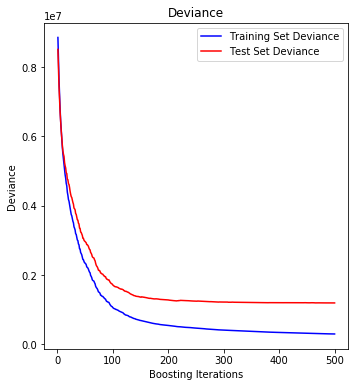

In [22]:
params = {'n_estimators': 500}

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbrt.staged_predict(X_test)):
    test_score[i] = gbrt.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbrt.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')